In [13]:
!pip install seaborn

In [14]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Su\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

"não sei porque eu fiz isso, mas deu bom" - gabi

In [5]:
df = pd.read_csv('./data/train.csv', index_col = 0)

In [6]:
df

_id  \
1287            61073a290f87cd311d770171   
2897            6112a3a0787fd9019c54239c   
2572            610dada27eb12e111ac7c356   
5200  ObjectId(612e8d51d47e720ff7025396)   
4370  ObjectId(61240226befb2869ab77e1aa)   
...                                  ...   
3751  ObjectId(611bb2e6fb953157b26e9031)   
5629  ObjectId(6132827a8b865f84d4b1d150)   
6403  ObjectId(613f4e62227045190610b54e)   
1382            61073a290f87cd311d7701d0   
6140  ObjectId(613a6c69a6c2885c6515974b)   

                                                  title        date  \
1287        Oculus Quest Production Stymied by Pandemic  2020-05-06   
2897  New research on preventing infant deaths due t...  2021-08-10   
2572  Recycling a cell's energy centers to ward off ...  2021-08-06   
5200          Upcoming flu season will likely be severe  2021-08-31   
4370  Pfizer-BioNTech COVID-19 Vaccine Receives Full...  2021-08-23   
...                                                 ...         ...   
3751  Babies, Toddlers Spread COVID Faster in the Ho...  2021-08-17   
5629  Americans' COVID-19 Medical Bills Are Set to Rise  2021-09-03   
6403  Persistent dysfunction in natural killer cells...  2021-09-13   
1382  Israel to offer 3rd COVID booster shot to olde...  2021-07-29   
6140  Racial, Ethnic Disparities Seen for Severe Flu...  2021-09-09   

                                                   text  \
1287  The next generation of Oculus Quest virtual re...   
2897  Information about the most effective antibioti...   
2572  Scientists have long known that living cells a...   
5200  The 2021-22 influenza season is likely to be m...   
4370  MONDAY, Aug. 23, 2021 (HealthDay News) -- The ...   
...                                                 ...   
3751  TUESDAY, Aug. 17, 2021 (HealthDay News) -- Inf...   
5629  FRIDAY, Sept. 3, 2021 (HealthDay News) -- COVI...   
6403  Based on previous studies of the COVID-19 pand...   
1382  Israel's prime minister on Thursday announced ...   
6140  THURSDAY, Sept. 9, 2021 (HealthDay News) -- Ra...   

                                                    url   craw_date  \
1287  https://www.technewsworld.com/story/oculus-que...  2021-07-29   
2897  https://medicalxpress.com/news/2021-08-infant-...  2021-08-10   
2572  https://medicalxpress.com/news/2021-08-recycli...  2021-08-06   
5200  https://medicalxpress.com/news/2021-08-upcomin...  2021-08-31   
4370  https://consumer.healthday.com/pfizer-biontech...  2021-08-23   
...                                                 ...         ...   
3751  https://consumer.healthday.com/b-8-17-babies-t...  2021-08-17   
5629  https://consumer.healthday.com/americans-covid...  2021-09-03   
6403  https://medicalxpress.com/news/2021-09-persist...  2021-09-13   
1382  https://medicalxpress.com/news/2021-07-israel-...  2021-07-29   
6140  https://consumer.healthday.com/racial-ethnic-d...  2021-09-09   

              crawler  
1287  Tech News World  
2897   Medical Xpress  
2572   Medical Xpress  
5200   Medical Xpress  
4370       Health Day  
...               ...  
3751       Health Day  
5629       Health Day  
6403   Medical Xpress  
1382   Medical Xpress  
6140       Health Day  

[4743 rows x 7 columns]

In [7]:
df['tokens_text'] = df.apply(lambda X:nltk.word_tokenize(X.text), axis = 1)

tokens para texto

In [8]:
df['tokens_title'] = df.apply(lambda X:nltk.word_tokenize(X.title), axis = 1)

tokens para títulos

In [22]:
df['title_min'] = df.title.str.lower()
df['tokens_title_min'] = df.apply(lambda X:nltk.word_tokenize(X.title_min), axis = 1)

tokens para títulos com letras TODAS em minúsculo

In [30]:
df

_id  \
1287            61073a290f87cd311d770171   
2897            6112a3a0787fd9019c54239c   
2572            610dada27eb12e111ac7c356   
5200  ObjectId(612e8d51d47e720ff7025396)   
4370  ObjectId(61240226befb2869ab77e1aa)   
...                                  ...   
3751  ObjectId(611bb2e6fb953157b26e9031)   
5629  ObjectId(6132827a8b865f84d4b1d150)   
6403  ObjectId(613f4e62227045190610b54e)   
1382            61073a290f87cd311d7701d0   
6140  ObjectId(613a6c69a6c2885c6515974b)   

                                                  title        date  \
1287        Oculus Quest Production Stymied by Pandemic  2020-05-06   
2897  New research on preventing infant deaths due t...  2021-08-10   
2572  Recycling a cell's energy centers to ward off ...  2021-08-06   
5200          Upcoming flu season will likely be severe  2021-08-31   
4370  Pfizer-BioNTech COVID-19 Vaccine Receives Full...  2021-08-23   
...                                                 ...         ...   
3751  Babies, Toddlers Spread COVID Faster in the Ho...  2021-08-17   
5629  Americans' COVID-19 Medical Bills Are Set to Rise  2021-09-03   
6403  Persistent dysfunction in natural killer cells...  2021-09-13   
1382  Israel to offer 3rd COVID booster shot to olde...  2021-07-29   
6140  Racial, Ethnic Disparities Seen for Severe Flu...  2021-09-09   

                                                   text  \
1287  The next generation of Oculus Quest virtual re...   
2897  Information about the most effective antibioti...   
2572  Scientists have long known that living cells a...   
5200  The 2021-22 influenza season is likely to be m...   
4370  MONDAY, Aug. 23, 2021 (HealthDay News) -- The ...   
...                                                 ...   
3751  TUESDAY, Aug. 17, 2021 (HealthDay News) -- Inf...   
5629  FRIDAY, Sept. 3, 2021 (HealthDay News) -- COVI...   
6403  Based on previous studies of the COVID-19 pand...   
1382  Israel's prime minister on Thursday announced ...   
6140  THURSDAY, Sept. 9, 2021 (HealthDay News) -- Ra...   

                                                    url   craw_date  \
1287  https://www.technewsworld.com/story/oculus-que...  2021-07-29   
2897  https://medicalxpress.com/news/2021-08-infant-...  2021-08-10   
2572  https://medicalxpress.com/news/2021-08-recycli...  2021-08-06   
5200  https://medicalxpress.com/news/2021-08-upcomin...  2021-08-31   
4370  https://consumer.healthday.com/pfizer-biontech...  2021-08-23   
...                                                 ...         ...   
3751  https://consumer.healthday.com/b-8-17-babies-t...  2021-08-17   
5629  https://consumer.healthday.com/americans-covid...  2021-09-03   
6403  https://medicalxpress.com/news/2021-09-persist...  2021-09-13   
1382  https://medicalxpress.com/news/2021-07-israel-...  2021-07-29   
6140  https://consumer.healthday.com/racial-ethnic-d...  2021-09-09   

              crawler                                             tokens  \
1287  Tech News World  [The, next, generation, of, Oculus, Quest, vir...   
2897   Medical Xpress  [Information, about, the, most, effective, ant...   
2572   Medical Xpress  [Scientists, have, long, known, that, living, ...   
5200   Medical Xpress  [The, 2021-22, influenza, season, is, likely, ...   
4370       Health Day  [MONDAY, ,, Aug., 23, ,, 2021, (, HealthDay, N...   
...               ...                                                ...   
3751       Health Day  [TUESDAY, ,, Aug., 17, ,, 2021, (, HealthDay, ...   
5629       Health Day  [FRIDAY, ,, Sept., 3, ,, 2021, (, HealthDay, N...   
6403   Medical Xpress  [Based, on, previous, studies, of, the, COVID-...   
1382   Medical Xpress  [Israel, 's, prime, minister, on, Thursday, an...   
6140       Health Day  [THURSDAY, ,, Sept., 9, ,, 2021, (, HealthDay,...   

                                           tokens_title  
1287  [Oculus, Quest, Production, Stymied, by, Pande...  
2897  [New, research, on, preventing, infant, deaths...  
2572  

In [24]:
list_token_title = np.concatenate(df.tokens_title.values).ravel().tolist()
print(len(list_token_title))

50865


lista dos tokens dos títulos + 
número de tokens para os títulos

In [23]:
list_token_title_min = np.concatenate(df.tokens_title_min.values).ravel().tolist()
print(len(list_token_title_min))

50850


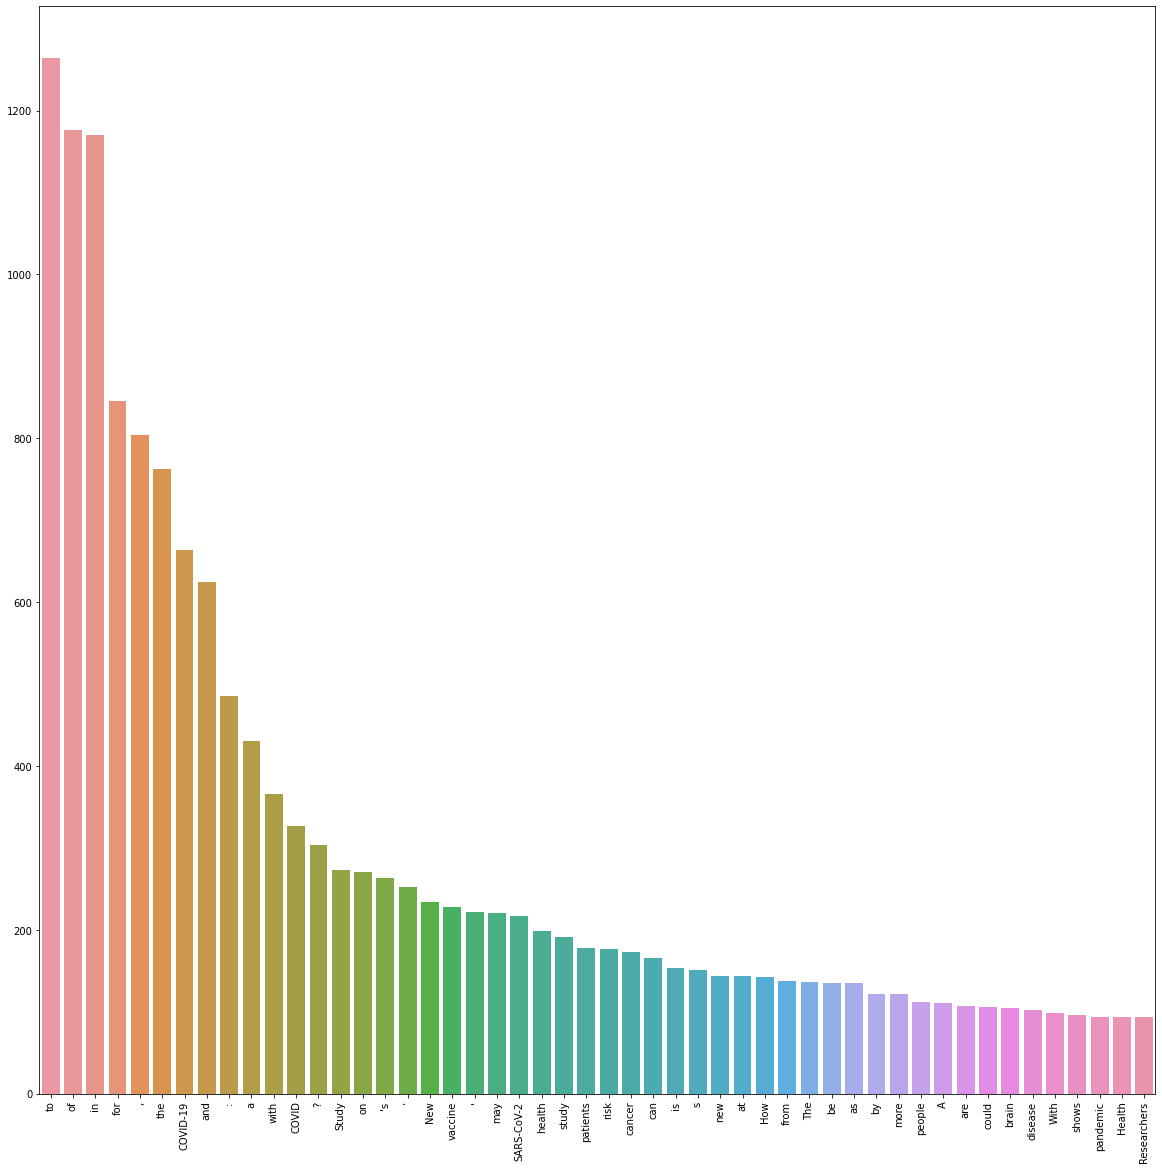

In [16]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = nltk.FreqDist(list_token_title).most_common(50)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(20,20))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=90);

há muitos lixos, mas palavras como: COVID, Study, new, vaccine, health, risk, cancer, people,.. de destacam
vai ser importante tirarmos lixos como "to", "of", "in", "for", ",", "the",... e padronizar as palavras deixando tudo em minúsculo

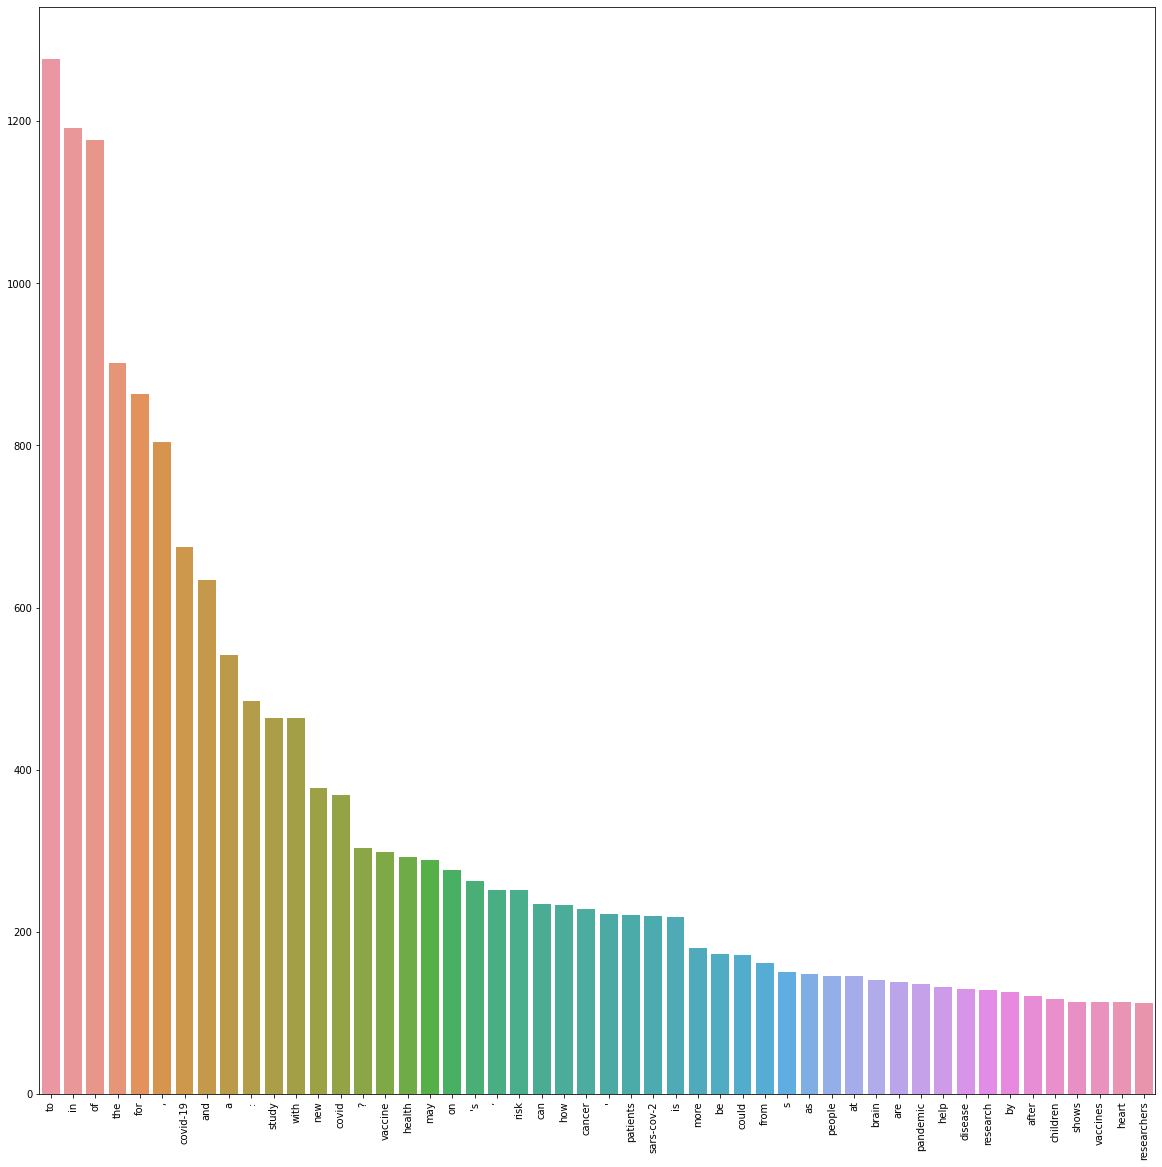

In [25]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = nltk.FreqDist(list_token_title_min).most_common(50)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(20,20))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=90);

ainda tem palavras parecidas como covid, covid-19, sans-cov,... + verbos! Achamos que não será interessante utilizar os verbos para pesquisa

In [31]:
stopwords = nltk.corpus.stopwords.words('english')
list_token_title_min_stopwords = []

for word in list_token_title_min:
    if word not in stopwords:
        list_token_title_min_stopwords.append(word)

In [32]:
list_token_title_min_stopwords

['oculus',
 'quest',
 'production',
 'stymied',
 'pandemic',
 'new',
 'research',
 'preventing',
 'infant',
 'deaths',
 'due',
 'neonatal',
 'sepsis',
 'recycling',
 'cell',
 "'s",
 'energy',
 'centers',
 'ward',
 'parkinson',
 "'s",
 'disease',
 'upcoming',
 'flu',
 'season',
 'likely',
 'severe',
 'pfizer-biontech',
 'covid-19',
 'vaccine',
 'receives',
 'full',
 'fda',
 'approval',
 'venezuelan',
 'health-care',
 'workers',
 'secretly',
 'collecting',
 'covid',
 'stats',
 'national',
 'academies',
 '’',
 'report',
 'took',
 'pharma-friendly',
 'stance',
 'millions',
 'gifts',
 'drugmakers',
 'guadeloupe',
 'impose',
 'new',
 'curfew',
 'due',
 'alarming',
 'covid',
 'surge',
 'researchers',
 'create',
 'qiba',
 'profile',
 'cartilage',
 'compositional',
 'imaging',
 'delta',
 'variant',
 'infections',
 'surge',
 ',',
 'americans',
 'favor',
 'vaccine',
 'mandates',
 'hans',
 'berger',
 '’',
 'quest',
 'telepathy',
 'spurred',
 'modern',
 'brain',
 'science',
 'prevent',
 'suicides',

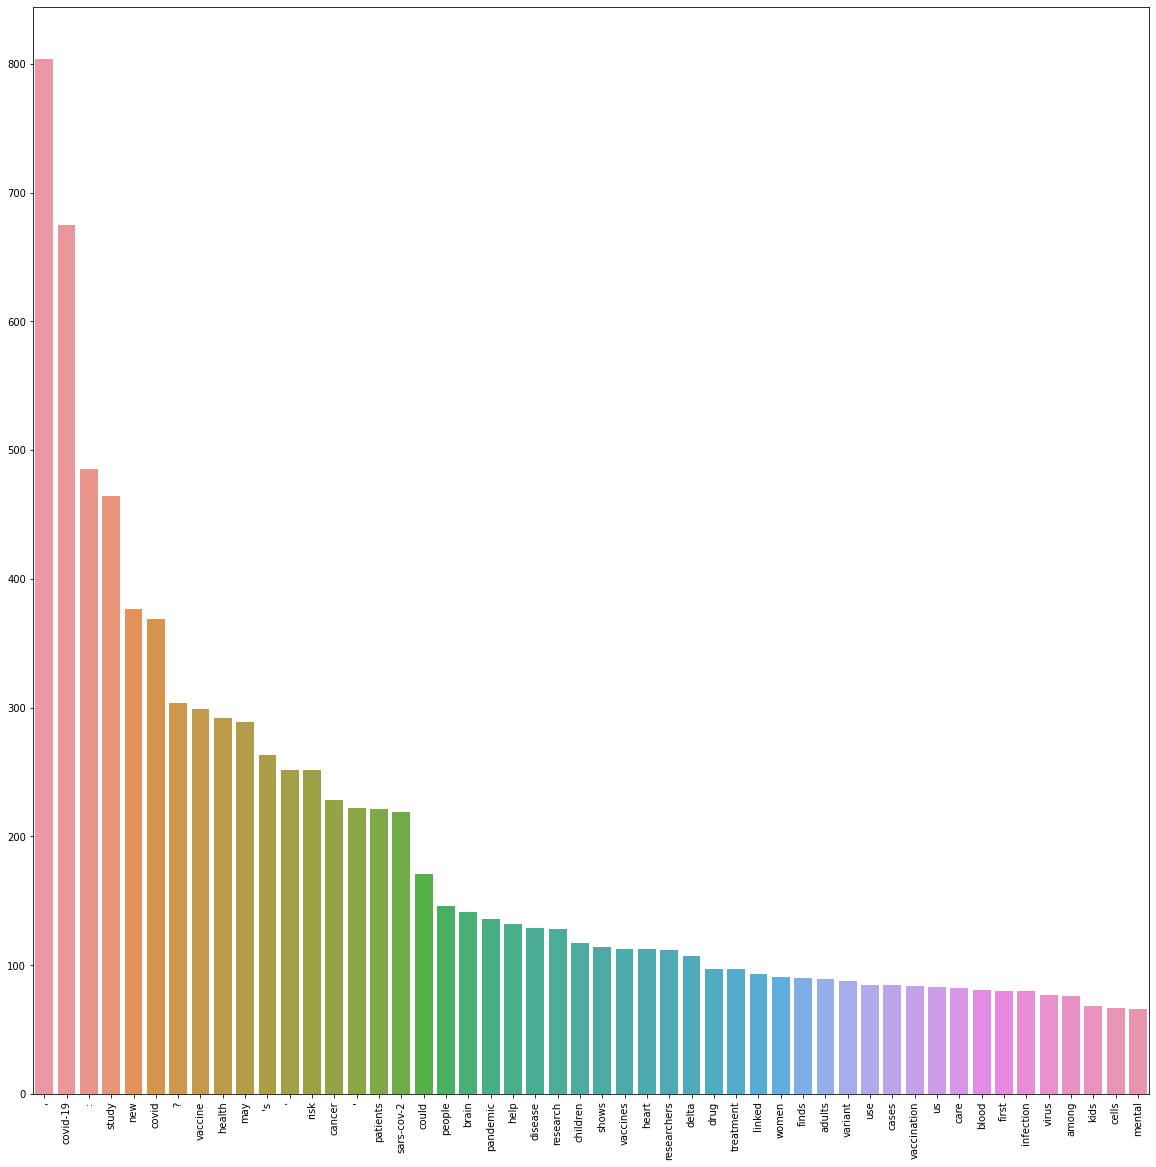

In [48]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = nltk.FreqDist(list_token_title_min_stopwords).most_common(50)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(20,20))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=90);

In [45]:
scharacters = """
,_().- '"’‘/:&!?
"""
# characters interessantes para deixar
    # %$

list_token_title_min_stopwords_scharacters = []

for token in list_token_title_min_stopwords:
    if token not in scharacters:
        list_token_title_min_stopwords_scharacters.append(token)

In [46]:
list_token_title_min_stopwords_scharacters

['oculus',
 'quest',
 'production',
 'stymied',
 'pandemic',
 'new',
 'research',
 'preventing',
 'infant',
 'deaths',
 'due',
 'neonatal',
 'sepsis',
 'recycling',
 'cell',
 "'s",
 'energy',
 'centers',
 'ward',
 'parkinson',
 "'s",
 'disease',
 'upcoming',
 'flu',
 'season',
 'likely',
 'severe',
 'pfizer-biontech',
 'covid-19',
 'vaccine',
 'receives',
 'full',
 'fda',
 'approval',
 'venezuelan',
 'health-care',
 'workers',
 'secretly',
 'collecting',
 'covid',
 'stats',
 'national',
 'academies',
 'report',
 'took',
 'pharma-friendly',
 'stance',
 'millions',
 'gifts',
 'drugmakers',
 'guadeloupe',
 'impose',
 'new',
 'curfew',
 'due',
 'alarming',
 'covid',
 'surge',
 'researchers',
 'create',
 'qiba',
 'profile',
 'cartilage',
 'compositional',
 'imaging',
 'delta',
 'variant',
 'infections',
 'surge',
 'americans',
 'favor',
 'vaccine',
 'mandates',
 'hans',
 'berger',
 'quest',
 'telepathy',
 'spurred',
 'modern',
 'brain',
 'science',
 'prevent',
 'suicides',
 'johns',
 'hopki

In [47]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = nltk.FreqDist(list_token_title_min_stopwords_scharacters).most_common(50)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(20,20))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=90);

PRÓXIMOS PASSOS: ditokens, juntar os token, STEM-WORDS, tomar cuidado com os dados: será que é interessante passar os dados para minúsculo? Tipo US (united states) e us (a gente), fazer cluster (saúde, vacina, doença,..)

fazer tudo isso que já fizemos, mas para o texto!

https://machinelearningmastery.com/clean-text-machine-learning-python/